In [141]:
'''
This Progam is to practice variety of algorithms and techniques on the
white-wine dataset. Among those techniques the RandomForestRegressor,
Partial Dependency, and ICE is used to display which features are best
and depend on the quality of the wine.
'''


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("winequality-white.csv",delimiter=';')
dff = pd.DataFrame(data)
data.shape

(4898, 12)

In [114]:
pd.DataFrame(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [173]:
#Splitting the data for training and testing

subsetData = data[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
                  "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]]

target = []
target.append(subsetData.iloc[:,11])

#Target Data will be based on quality of the wine from 1 poor to 10 rich
df = pd.DataFrame(target)
df = df.T

subsetData = subsetData.drop(columns='quality')

X_train, X_test, y_train, y_test = train_test_split(subsetData,df, random_state=42)

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


1. Train a Random Forest Regressor for teh dataset. Find the best model based on R-squared value using RandomizedSearchCV.

In [174]:
rf = RandomForestRegressor(n_estimators=5,random_state=42)
rf.fit(X_train, y_train.values.ravel())
print("Accuracy on WHO data set using RandomForest: {:.3f}".format(rf.score(X_train, y_train)))


Accuracy on WHO data set using RandomForest: 0.869


In [117]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
prediction = rf.predict(X_test)
print(f"R^2: {r2_score(y_test, prediction):.2f}")

R^2: 0.42


In [118]:
# Hyperparameter grid RandomizedSearchCV will search over
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [1, 2, 4, 10,11,12,13,14,15,16,17,18,19,20],
        "max_depth": [None, 4, 10, 20,21,22,23,24,25,26,27,28,29,30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4,5,6],
        "min_samples_leaf": [1, 2,3, 4]}

rs_model = RandomizedSearchCV(estimator=rf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=15; total time=   0.4s
[CV] END max_depth=24, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2; total time=   0.0s
[CV] END max_depth=24, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2; total time=   0.0s
[CV] END max_depth=24, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2; total time=   0.0s
[CV] END max_depth=24, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2; total time=   0.0s
[CV] END max_depth=24, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19; total time=   0.1s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19; total time=   0.1s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=13; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=13; total time=   0.1s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=13; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=13; total time=   0.1s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=13; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=16; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=16; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=16; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=16; total time=   0.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=16; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=19; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=17; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=17; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=17; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=17; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=17; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=19; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=19; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=19; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=19; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=19; total time=   0.1s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=16; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=16; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=16; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=16; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=16; total time=   0.2s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=19; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=19; total time=   0.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=19; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=19; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=19; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=16; total time=   0.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=16; total time=   0.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=16; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=16; total time=   1.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=16; total time=   1.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=13; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=13; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=13; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=13; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=13; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=16; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=16; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=16; total time=   0.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=16; total time=   1.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=16; total time=   0.7s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=24, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=13; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=24, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=13; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=24, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=13; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=24, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=13; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=24, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=13; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=17; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=17; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=17; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=17; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=17; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=5,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 4, 10, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 5, 6],
                                        'n_estimators': [1, 2, 4, 10, 11, 12,
                                                         13, 14, 15, 16, 17, 18,
                                                         19, 20]},
                   verbose=2)

In [119]:
rs_model.best_params_

{'n_estimators': 19,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [120]:
rf2 = RandomForestRegressor(n_estimators=19,min_samples_leaf=1,min_samples_split=6,max_features='sqrt',max_depth=None,random_state=42)
rf2.fit(X_train, y_train.values.ravel())
print("Accuracy on WHO data set using RandomForest: {:.3f}".format(rf.score(X_train, y_train)))

Accuracy on WHO data set using RandomForest: 0.869


In [137]:
#After using the RandomizedSearchCV I was able to find hyperparameters to make accuracy on model for
#predcition improvement from 0.22 to 0.43
prediction = rf2.predict(X_test)
print(f"R^2: {r2_score(y_test, prediction):.2f}")

R^2: 0.51


2. Use the model from question 1 for model interpretation and rank the features based on permutation importance.

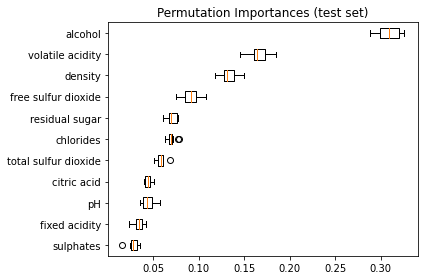

In [122]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
result = permutation_importance(rf2, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

3. Use the model from question 1 for model interpretation and interpret first sample from test data using SHAP algorithm.

In [172]:
import shap

X_train_summary = shap.kmeans(X_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()

ex = shap.KernelExplainer(rf.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

  0%|          | 0/1225 [00:00<?, ?it/s]

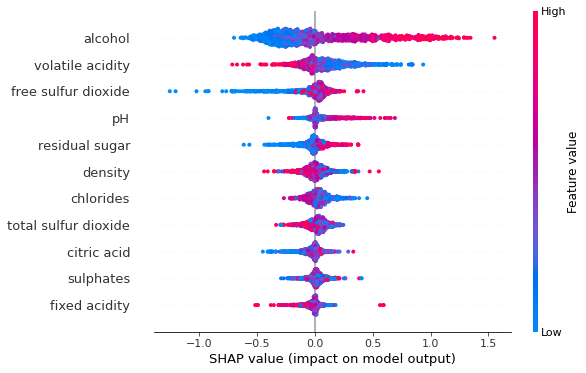

In [124]:
#This graph shows predictions from the test data set
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

4. Visualize partial dependence plot for each feature in the dataset using Sklearn.

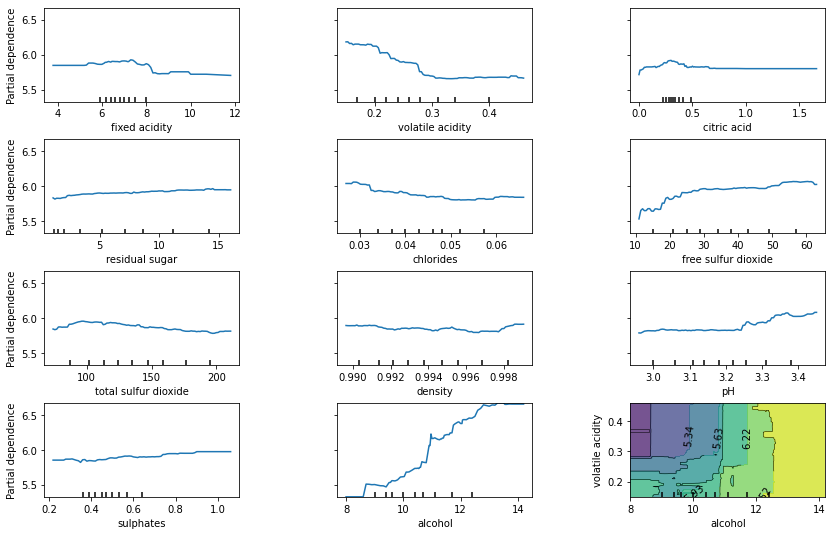

In [171]:
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence

features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
                  "total sulfur dioxide","density","pH","sulphates","alcohol",("alcohol","volatile acidity")]

axs = plot_partial_dependence(rf, X_train, features,target=0)

fig = plt.gcf()
fig.set_size_inches(14,9)
fig.subplots_adjust(wspace = 0.5,hspace = 0.4)

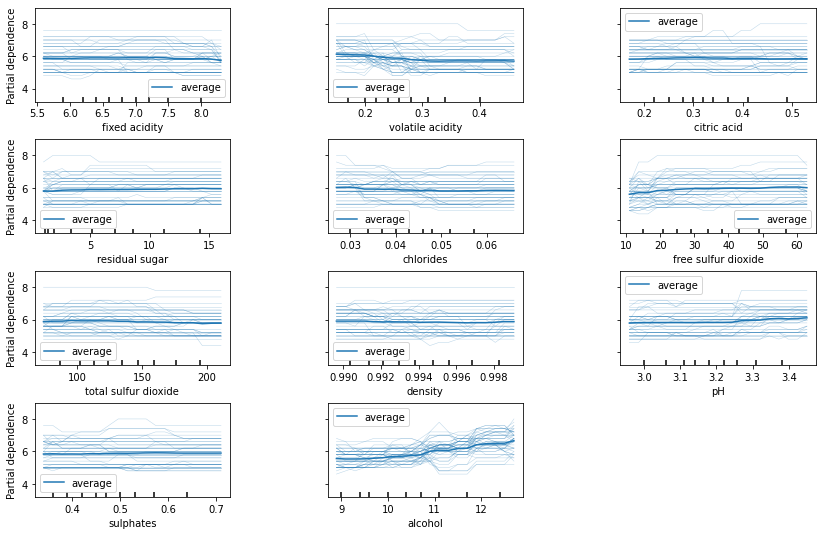

In [169]:
#from pdpbox import info_plots, get_dataset
from time import time

features2 = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
                  "total sulfur dioxide","density","pH","sulphates","alcohol"]

display = plot_partial_dependence(
       rf, X_train, features2, kind="both", subsample=50,
       n_jobs=3, grid_resolution=20, random_state=0)

fig2 = plt.gcf()
fig2.set_size_inches(14,9)
fig2.subplots_adjust(wspace = 0.5,hspace = 0.4)

Report
----------------


The technique I found useful the most was using Shap algorithm to see feature values on a wide scale, but combined with finding the R-squared value using RandomizedSearchCV helped me also visualize and find important features for best results. Those two algorithms help have an better understanding of the white wine dataset as alcohol, volatile acidity, and density were one of the most important features revealed by Shap and RandomizedSearch. By just doing RandomGorestRegressor the prediction accuracy was at a standing 0.42, once using RandomSearchCV I was able to raise the prediction precision up to 0.52. Other methods like Partial Dependency and ICE were useful to show the impact the feature had on the target, the target which is the quality of the wine. Factors that had very little impact on the quality of the wine were total sulfur dioxide,sulphates, and chlorides.  